In [4]:
# https://medium.com/@tejpal.abhyuday/trocr-transformer-based-optical-recognition-model-811f7b3217da
import cv2
import matplotlib.pyplot as plt

## Optical Character Recognition

### OCR using pytesseract

**`Installation Stesps:`**

1. https://pyimagesearch.com/2021/08/16/installing-tesseract-pytesseract-and-python-ocr-packages-on-your-system/

2. https://github.com/tesseract-ocr/tessdoc

In [19]:
import pytesseract

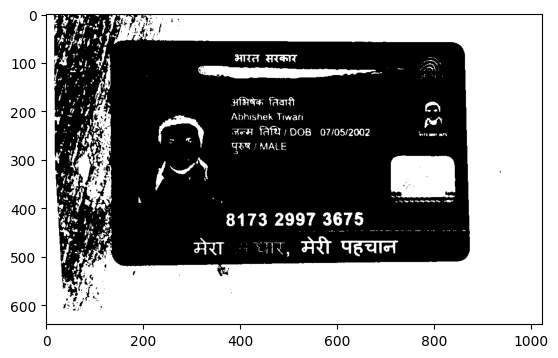

Hfsrtaferart a
AbhishekTiwari wn
smafaRDoOB07052002 toes
TeaMALE

817329973675
aRTcayALWedet




In [24]:

# Load the image
# img = cv2.imread("data\\01_raw_data\\bibek_pan.jpg")
img = cv2.imread("data\\01_raw_data\\sample_image1.jpg")

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Unable to load image at")
else:
    # Convert the image to grayscale for better OCR results
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to preprocess the image
    # cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU can be replaced with other methods depending on the image
    _, threshold_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    plt.imshow(threshold_img, cmap = 'gray')
    plt.show()

    # Extract the text from the preprocessed image
    # psm 6 stands for assuming a single uniform block of text.
    custom_config = r'--oem 3 --psm 3 -l eng+osd --tessdata-dir "C:\\Program Files\\Tesseract-OCR\\tessdata" -c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    text = pytesseract.image_to_string(threshold_img, config=custom_config)
    
    # Print the extracted text to the console
    print(text)

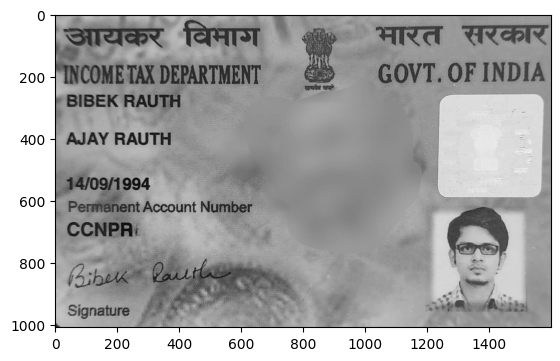

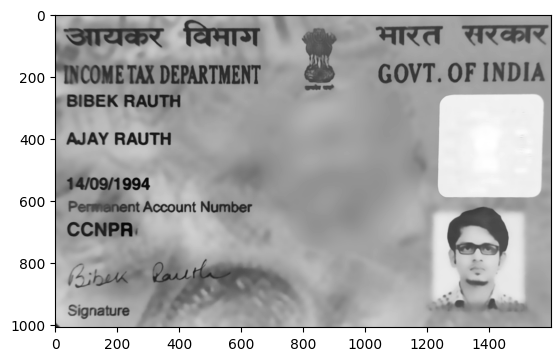

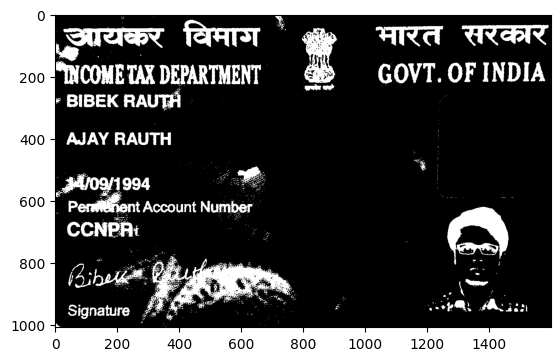

os fart

e BIBEK RAUTH

ATP

AJAYRAUTH

g fet ye me

yntAccount Number

s

ew

weeeMAMALaes



In [17]:
import cv2
import pytesseract

# Load the image
img = cv2.imread("data/01_raw_data/bibek_pan.jpg")

# Check if the image was loaded successfully
if img is None:
    print("Error: Unable to load image")
else:
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_img, cmap = 'gray')
    plt.show()
    
    # Scale the image (optional, depending on resolution)
    # gray_img = cv2.resize(gray_img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

    # Apply adaptive thresholding to get a binary image
    # thresh_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    #    cv2.THRESH_BINARY, 11, 2)

    # Denoising (if necessary)
    thresh_img = cv2.fastNlMeansDenoising(gray_img, None, 30, 7, 21)
    plt.imshow(thresh_img, cmap = 'gray')
    plt.show()


    _, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)                                
    plt.imshow(thresh_img, cmap = 'gray')
    plt.show()
   
    # Extract the text from the preprocessed image using optimized Tesseract configuration
    # custom_config = r'--oem 3 --psm 11 -l eng'
    custom_config = r'--oem 1 --psm 3 -l eng+osd --tessdata-dir "C:\\Program Files\\Tesseract-OCR\\tessdata" -c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

    text = pytesseract.image_to_string(thresh_img, config=custom_config)

    # Print the extracted text to the console
    print(text)


In [7]:
text

''

In [18]:
# plt.imshow(threshold_img_blurred, cmap = 'gray')
# plt.show()

In [20]:
# from skimage import io, transform
# import numpy as np
# import matplotlib.pyplot as plt

# # # Let's assume we have an image URL
# # image_url = 'https://upload.wikimedia.org/wikipedia/commons/0/08/Uneven_illumination.jpg'
# # image = io.imread(image_url)
# img = cv2.imread("data\\01_raw_data\\pan_4.webp")
# # For simplicity, let's convert the image to grayscale
# from skimage.color import rgb2gray
# gray_image = rgb2gray(img)

# # Detect edges in the image
# from skimage.filters import sobel
# edges = sobel(gray_image)

# # Hough transform to detect lines
# from skimage.transform import hough_line, hough_line_peaks
# h, theta, d = hough_line(edges)

# # Find the angles of the lines
# angles = []
# _, angle, _ = hough_line_peaks(h, theta, d)
# for a in angle:
#     angles.append(a)

# # Calculate the average angle
# average_angle = np.rad2deg(np.mean(angles))

# # Display the original and edge-detected image
# fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# axes[0].imshow(gray_image, cmap='gray')
# axes[0].set_title('Original Image')
# axes[1].imshow(edges, cmap='gray')
# axes[1].set_title('Edge Detected Image')
# plt.show()

# average_angle


In [25]:
# Rotate the image by -5 degrees to correct the tilt
# corrected_image = transform.rotate(gray_image, -average_angle)

# # Let's display the corrected image
# plt.imshow(corrected_image, cmap='gray')
# plt.title('Corrected Image')
# plt.show()

### OCR using PaddleOCR

Due to its high accuracy and good speed, CRNN is an optimal choice for OCR. Latest libraries like Easy-ocr, Keras-ocr and PaddleOCR are based on CRNN and provide easy-to-use pretrained models. 

PaddleOCR supports more than 80 languages (depending upon the OCR algorithm used). But the flagship PP-OCR provides support for both Chinese and English languages. The flagship OCR algorithm PP-OCR is one of the best OCR tools available. So far, It has three versions as of now PP-OCR, PP-OCRv2 and PP-OCRv3. All of these models are built on CRNN as seen in the previous section and are ultra-lightweight. Let’s take a look and apply it to some of the various types of scenarios. 

In [4]:
# Importing required functions for inference and visualization.
from paddleocr import PaddleOCR, draw_ocr
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
ocr = PaddleOCR(use_angle_cls=True, use_gpu=False)

[2024/04/06 23:57:06] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\rauth/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\rauth/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None,

In [22]:
def show_ocr(ocr, img_path, font):

    result = ocr.ocr(img_path)
    # save_path = os.path.join(out_path, img_path.split('/')[-1] + 'output')

    image = cv2.imread(img_path)

    boxes = [line[0] for line in result[0]]
    txts = [line[1][0] for line in result[0]]
    scores = [line[1][1] for line in result[0]]

    im_show = draw_ocr(image, boxes, txts, scores, font_path=font)

    # cv2.imwrite(save_path, im_show)

    img = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img)	
    # return result


[2024/04/07 00:03:22] ppocr DEBUG: dt_boxes num : 13, elapsed : 0.061531782150268555
[2024/04/07 00:03:22] ppocr DEBUG: cls num  : 13, elapsed : 0.03559732437133789


[2024/04/07 00:03:23] ppocr DEBUG: rec_res num  : 13, elapsed : 0.3737812042236328


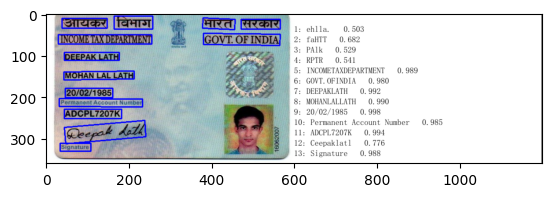

In [23]:
img_path = "data\\01_raw_data\\pan_2.jpg"
font = "data\\01_raw_data\\simfang.ttf"
show_ocr(ocr, img_path, font)
# result

In [24]:
# result[0][0]

In [25]:
# [line[1][0] for line in result[0]]

### Keras OCR

In [27]:
import keras_ocr
import matplotlib.pyplot as plt

In [28]:
pipeline = keras_ocr.pipeline.Pipeline()
# Read images from folder path to image object
images = [
    keras_ocr.tools.read(img) for img in ['data\\01_raw_data\\pan_2.jpg',
                                          'data\\01_raw_data\\pan_3.webp',]
]

Looking for C:\Users\rauth\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\rauth\.keras-ocr\crnn_kurapan.h5


2/2 [==============================] - 4s 602ms/step


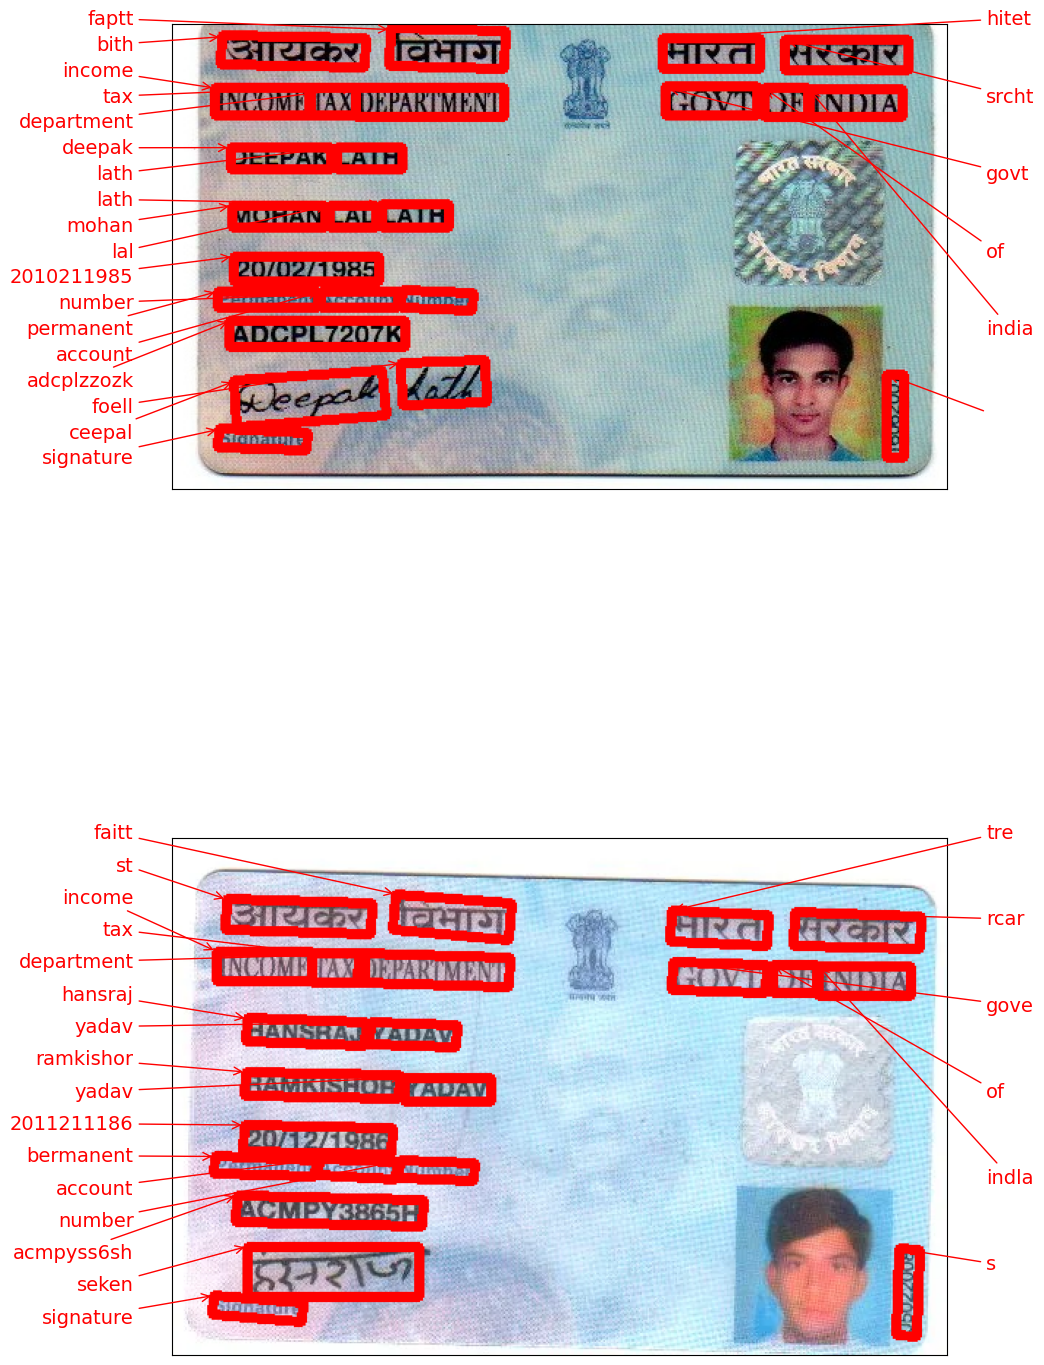

In [29]:
# generate text predictions from the images
prediction_groups = pipeline.recognize(images)

# plot the text predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, 
                                    predictions=predictions, 
                                    ax=ax)

In [30]:
prediction_groups

[[('faptt',
   array([[150.12636  ,   3.7865593],
          [229.33836  ,   5.005205 ],
          [228.93587  ,  31.16824  ],
          [149.72386  ,  29.949594 ]], dtype=float32)),
  ('bith',
   array([[ 34.016018,   8.766443],
          [133.22006 ,  10.054808],
          [132.95901 ,  30.155313],
          [ 33.75497 ,  28.86695 ]], dtype=float32)),
  ('hitet',
   array([[337.,  10.],
          [404.,  10.],
          [404.,  31.],
          [337.,  31.]], dtype=float32)),
  ('srcht',
   array([[421.,  11.],
          [506.,  11.],
          [506.,  32.],
          [421.,  32.]], dtype=float32)),
  ('income',
   array([[29., 44.],
          [94., 44.],
          [94., 63.],
          [29., 63.]], dtype=float32)),
  ('tax',
   array([[ 95.,  44.],
          [126.,  44.],
          [126.,  63.],
          [ 95.,  63.]], dtype=float32)),
  ('department',
   array([[126.,  44.],
          [228.,  44.],
          [228.,  64.],
          [126.,  64.]], dtype=float32)),
  ('govt',
   array